In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import firwin
from shoebox.firwin_torch import firwin_torch
from shoebox.firwin_scipy import firwin_scipy
import pandas as pd


In [29]:
#df = pd.read_csv('./results/real_room_ir_0_None_K_values.txt', )
#df = pd.read_csv('./results/ism_280_multi_low_0_None_K_values.txt', )
df = pd.read_csv('./imgs/arni_MSELoss_0_10/real_room_ir_0_10_MSELoss_kValues.txt', )

In [14]:
df.shape

(60, 7)

In [31]:
df.drop(df[df.Min_Loss > 1000].index, inplace=True)

Max:59.631947 and Min:9.696009


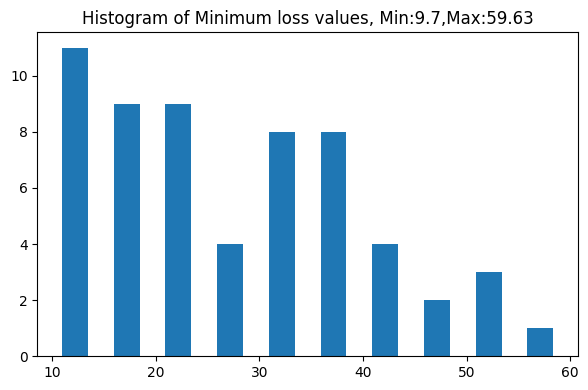

In [33]:
print(f"Max:{df['Min_Loss'].max()} and Min:{df['Min_Loss'].min()}")
plt.figure(figsize=(6,4))
plt.hist(df['Min_Loss'],  rwidth=0.5)
#plt.xticks(ticks=np.arange(70),  )
plt.title(f"Histogram of Minimum loss values, Min:{np.round(np.float64(df['Min_Loss'].min()),2)},Max:{np.round(np.float64(df['Min_Loss'].max()),2)}")
plt.tight_layout()
plt.show()

In [28]:
#df.rename(columns={'Rir No':'Rir_No'}, inplace=True)
#df.to_csv('ism_14_0_14_K_values.txt', index=False)

In [32]:
df.loc[df['Rir_No'] == 4]

,Kx,Ky,Kz,Noise,Convergence,Min_Loss,Rir_No
18,-0.126889,0.065990,0.017232,-126.090775,1.0,3.141534,4.0
19,-0.188184,0.107181,0.035421,-457.360200,1.0,4.033355,4.0
20,-0.062652,0.004475,0.000318,-770.030460,1.0,5.441784,4.0
21,-0.113930,0.062788,0.000255,-465.801670,1.0,7.445290,4.0
22,-0.046727,-0.003342,-0.003470,-136.869020,1.0,4.998780,4.0
23,-0.146280,0.095186,0.002324,-530.771060,0.0,10.429894,4.0


In [20]:
df.loc[df['Min_Loss'] > 100]

,Kx,Ky,Kz,Noise,Convergence,Min_Loss,Rir_No
49,-0.087587,0.009425,0.043025,-9.294599,0.0,1103.9941,9.0


In [38]:
ff = np.load('./rirData/ism_140_multi.npy', allow_pickle=False)

In [39]:
ff.shape

(140, 96009)

In [45]:
from optimizer_utils.bandRIR import rir_bands
from optimizer_utils.enveloper import envelope_generator, rir_smoothing

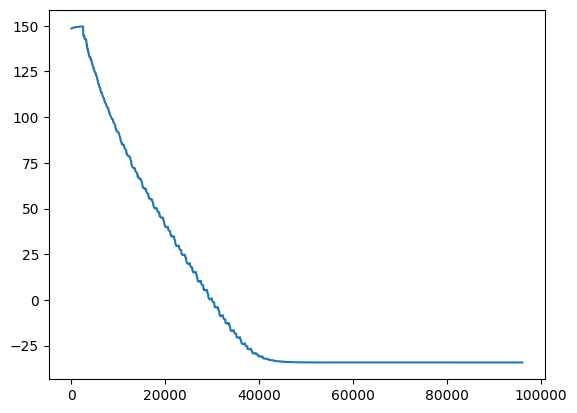

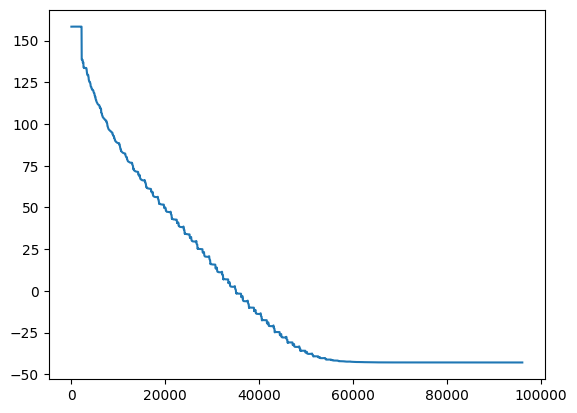

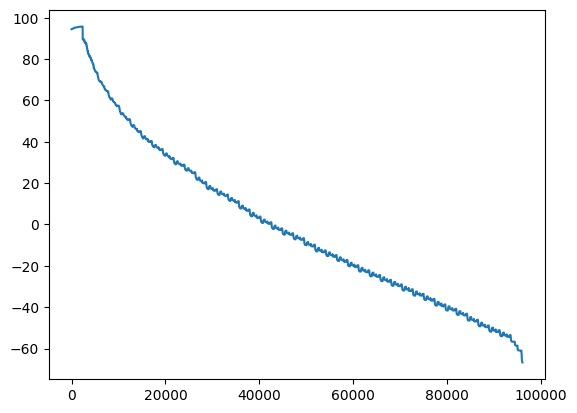

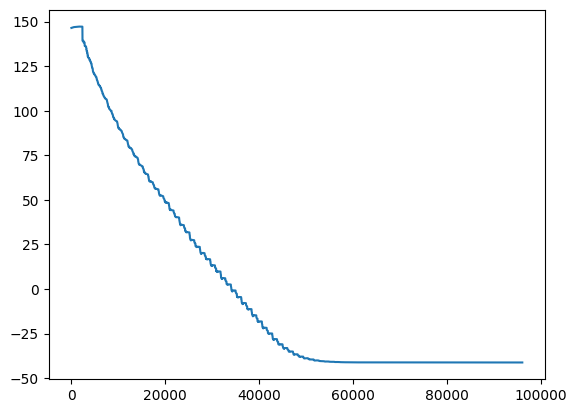

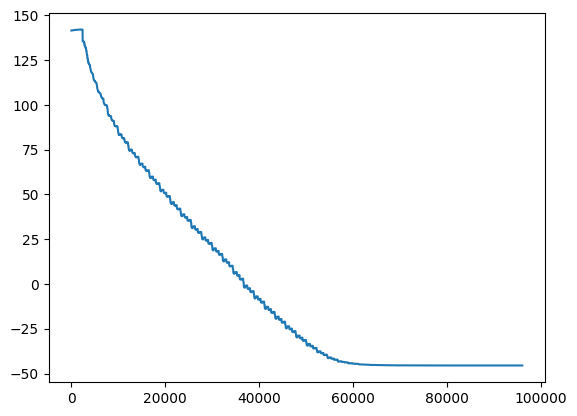

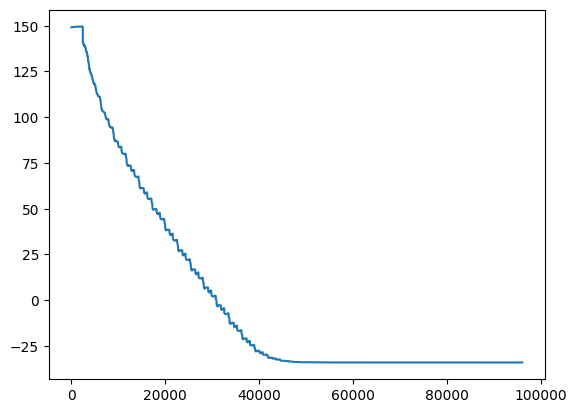

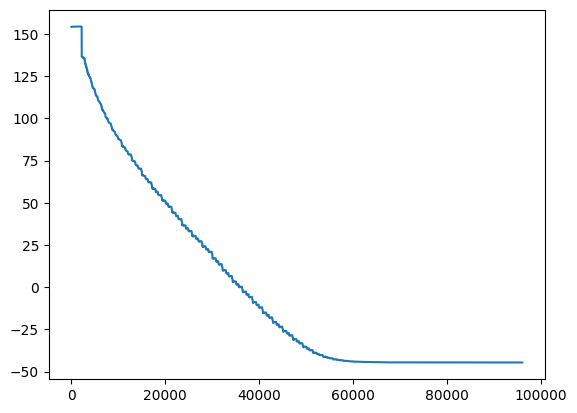

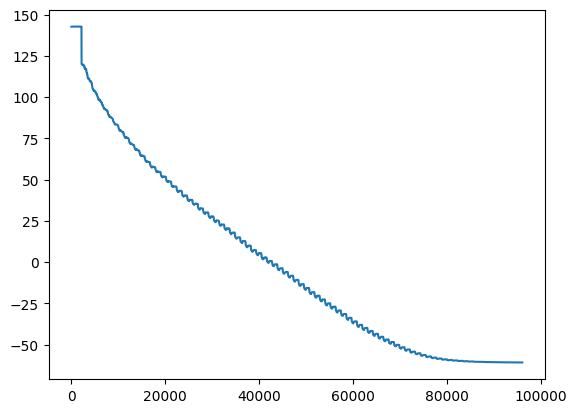

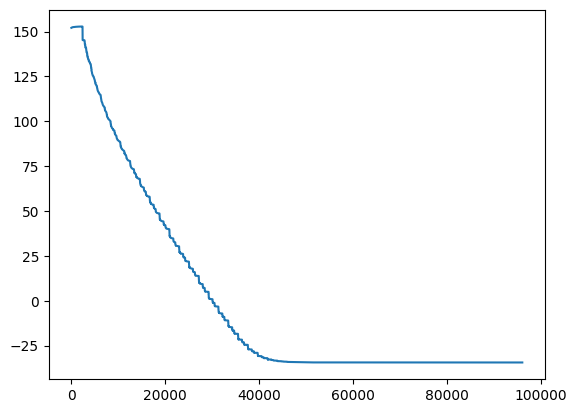

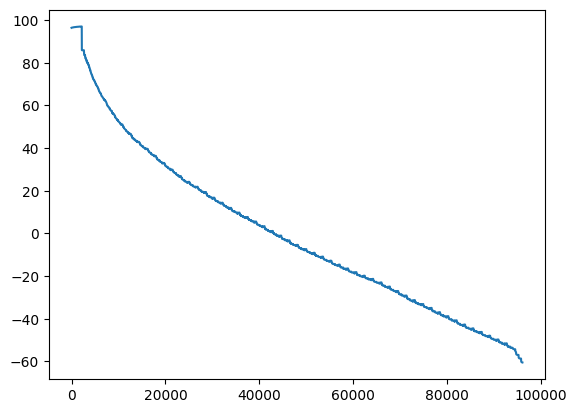

In [53]:
for i in range(10):
    tmp = torch.as_tensor(ff[i, 9:], dtype=torch.float)
    tmp2 = rir_smoothing(tmp, filter_len=4095)
    tmp3 = envelope_generator(tmp2, normalise=True, clip_=-150)
    plt.figure(i+1)
    plt.plot(tmp3)
    plt.show()